In [1]:
%load_ext autoreload
%autoreload 2

In [24]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from networkx.drawing.nx_agraph import graphviz_layout
import seaborn as sns
import numpy as np
import networkx as nx

from sklearn import preprocessing

In [15]:
import privtree

In [97]:
A = np.random.normal(loc=1, scale=0.1, size=50)
A = np.r_[A, np.random.normal(loc=5, scale=3, size=50)].reshape(-1, 1)
scaler = preprocessing.MinMaxScaler()
A = scaler.fit_transform(A)

In [146]:
eps = 10.0
myprivtree = privtree.PrivTree(A, eps)

0.3 0 0.2079441541679836


In [147]:
G, root = myprivtree.partition()

In [153]:
myprivtree.mle(n=100)

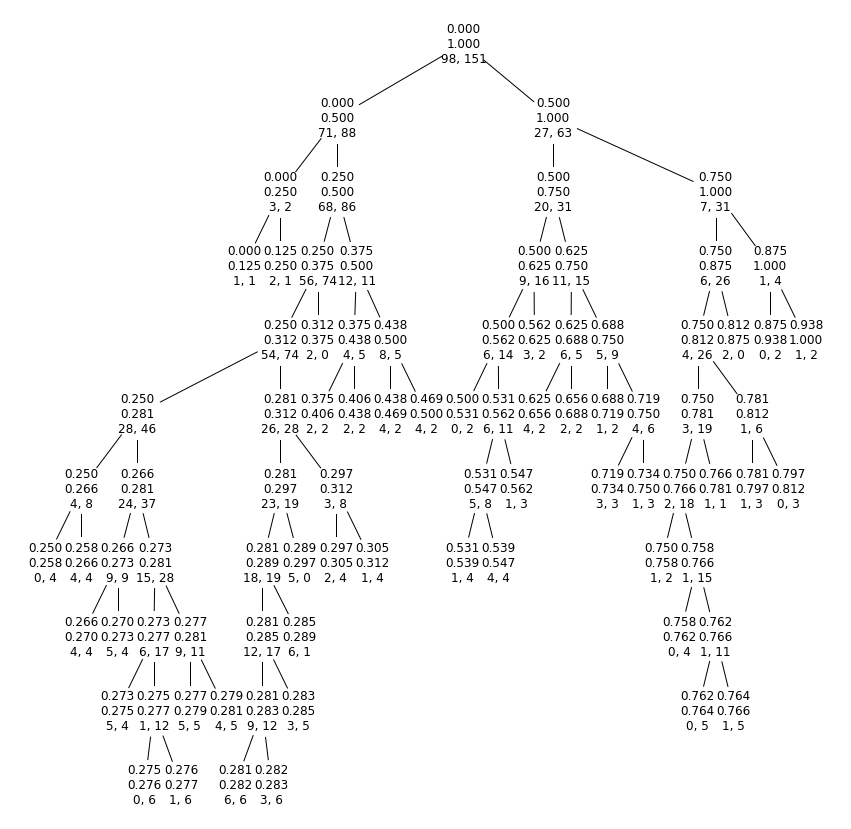

In [144]:
fig, ax = plt.subplots(figsize=(15, 15))
nx.nx_agraph.write_dot(G,'test.dot')
pos=graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=False, node_color = 'white', node_size = 2500)

<BarContainer object of 43 artists>

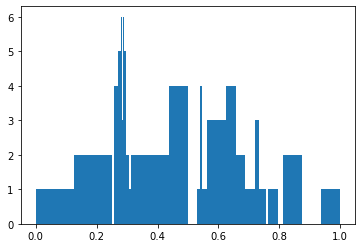

In [135]:
fig, ax = plt.subplots()

leaves = [x for x in G.nodes() if G.out_degree(x)==0 and G.in_degree(x)==1]
x = [leaf.lb[0] for leaf in leaves]
width = [leaf.ub[0] - leaf.lb[0] for leaf in leaves]
height_real = [leaf.c for leaf in leaves]
height_est = [leaf.var.value for leaf in leaves]

ax.bar(x=x, width=width, height=height_real, align='edge')

<BarContainer object of 43 artists>

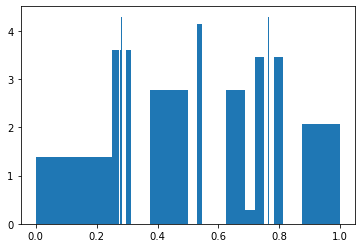

In [136]:
fig, ax = plt.subplots()
ax.bar(x=x, width=width, height=height_est, align='edge')

In [108]:
print([leaf.c for leaf in leaves])

[0, 0, 1, 2, 4, 4, 3, 0, 0, 0, 0, 0, 0, 1, 1, 0, 5, 1, 5, 4, 0, 2, 0, 0, 4, 3, 3, 6, 5, 3, 2, 4, 4, 2, 1, 1, 0, 1, 0, 3, 1, 1, 3, 4, 2, 1, 3, 1, 2, 1, 1, 0, 2, 1]


In [110]:
print([int(leaf.var.value) for leaf in leaves])

[1, 2, 2, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 2, 2, 0, 3, 3, 3, 3, 0, 2, 2, 0]


<AxesSubplot:ylabel='Count'>

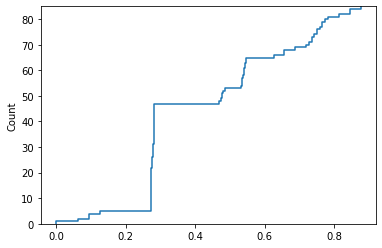

In [116]:
syn = []
for leaf in leaves:
    syn = np.r_[syn, np.linspace(leaf.lb[0], leaf.ub[0], int(leaf.var.value))]
sns.ecdfplot(syn, stat='count')

<AxesSubplot:>

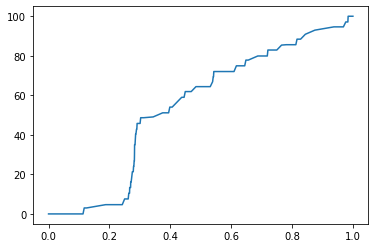

In [154]:
leaves = [x for x in G.nodes() if G.out_degree(x)==0 and G.in_degree(x)==1]
cc_x = np.r_[leaves[0].lb[0], [leaf.ub[0] for leaf in leaves]]
cc_y = np.r_[0, np.cumsum([leaf.var.value for leaf in leaves])]
sns.lineplot(x=cc_x, y=cc_y)

<AxesSubplot:ylabel='Count'>

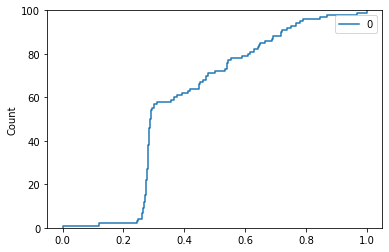

In [138]:
sns.ecdfplot(A, stat='count')

In [148]:
G = myprivtree.naive_est()

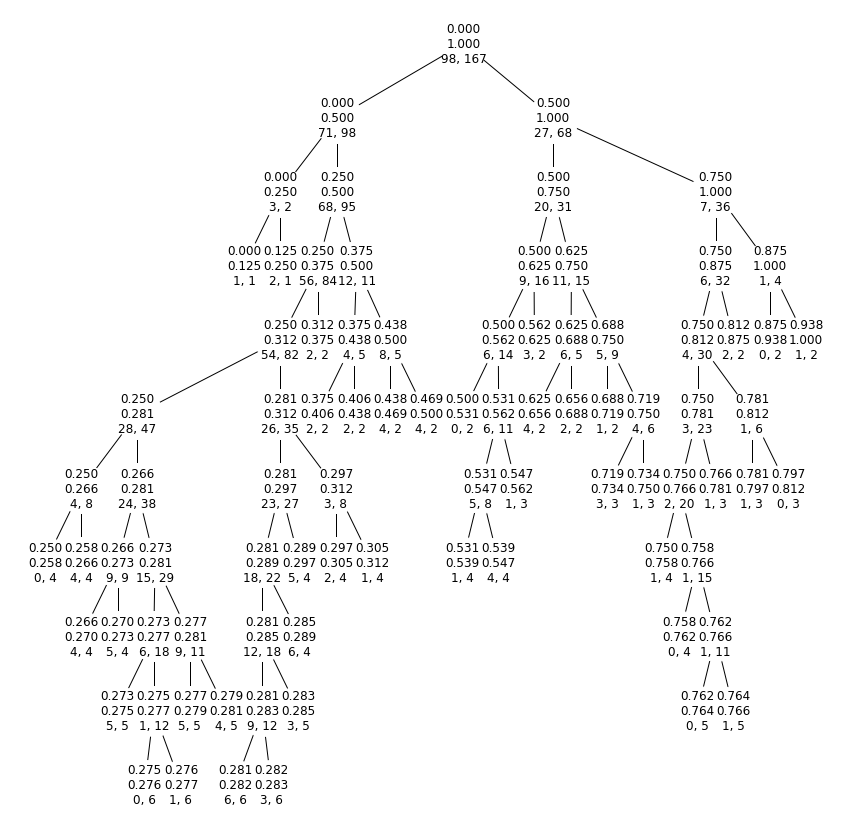

In [140]:
fig, ax = plt.subplots(figsize=(15, 15))
#nx.nx_agraph.write_dot(G,'test.dot')
pos=graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=False, node_color = 'white', node_size = 2500)

<AxesSubplot:>

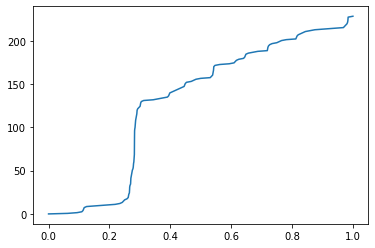

In [149]:
leaves = [x for x in G.nodes() if G.out_degree(x)==0 and G.in_degree(x)==1]
cc_x = np.r_[leaves[0].lb[0], [leaf.ub[0] for leaf in leaves]]
cc_y = np.r_[0, np.cumsum([leaf.var.value for leaf in leaves])]
sns.lineplot(x=cc_x, y=cc_y)

<AxesSubplot:ylabel='Count'>

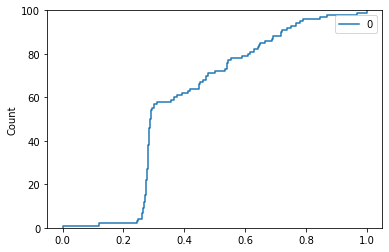

In [150]:
sns.ecdfplot(A, stat='count')

In [155]:
len(leaves)

142

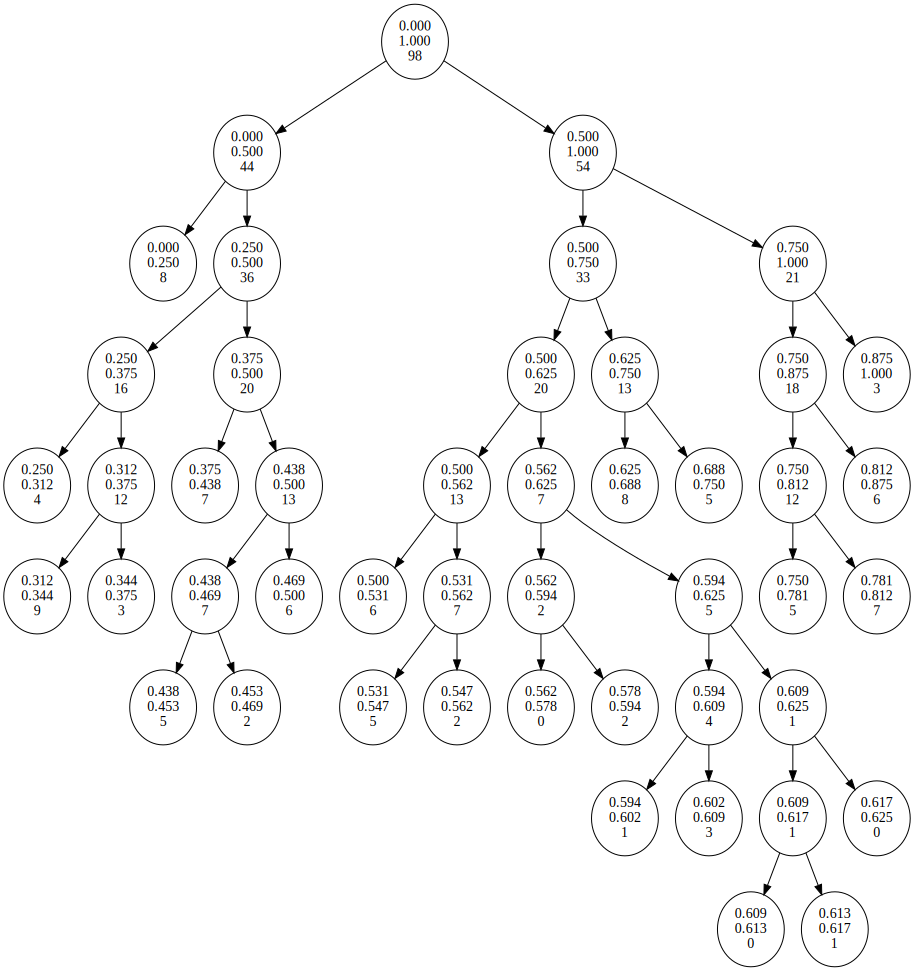

In [49]:
from networkx.drawing.nx_agraph import to_agraph
import graphviz

A = to_agraph(G)
A.layout('dot')
#A.draw('strong_dependency_graph.png')
graphviz.Source(A.to_string())